<a href="https://colab.research.google.com/github/pas3n7/ColabDataScienceLearning/blob/main/Distributional_Financial_Accounts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas_alive
import pandas_alive
download = True

In [ ]:
 if download:
    !wget "https://www.federalreserve.gov/releases/z1/dataviz/download/zips/dfa.zip"
    !unzip dfa.zip
    !ls

In [ ]:
genworth = pd.read_csv("/content/dfa-generation-shares-detail.csv")
genworth['Date'] = pd.PeriodIndex(genworth['Date'].str.replace(':', '-'), freq='Q').to_timestamp()
toplot = genworth.set_index(['Date','Category'])

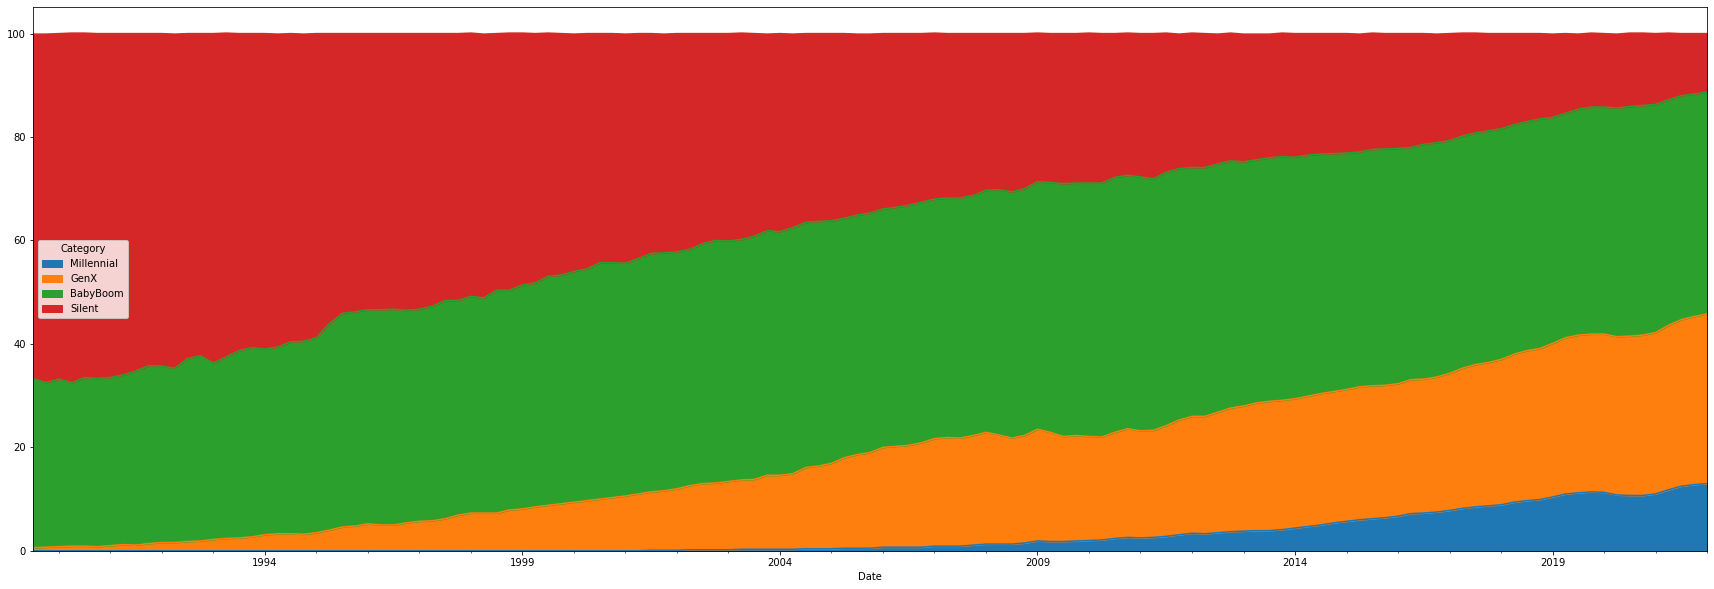

In [ ]:
#@title Select Category { run: "auto" }
dropdown = 'Real estate' #@param ['Assets', 'Nonfinancial assets', 'Real estate', 'Consumer durables','Financial assets', 'Checkable deposits and currency',       'Time deposits and short-term investments', 'Money market fund shares',       'Debt securities', 'U.S. government and municipal securities',       'Corporate and foreign bonds', 'Loans (Assets)',       'Other loans and advances (Assets)', 'Mortgages',       'Corporate equities and mutual fund shares', 'Life insurance reserves',       'Pension entitlements', 'Equity in noncorporate business',       'Miscellaneous assets', 'Liabilities', 'Loans (Liabilities)',       'Home mortgages', 'Consumer credit',       'Depository institutions loans n.e.c.',       'Other loans and advances (Liabilities)',       'Deferred and unpaid life insurance premiums', 'Net worth',       'Household count']
theplot = toplot[dropdown].unstack()[['Millennial', 'GenX', 'BabyBoom', 'Silent']].plot(kind='area', figsize=(30,10))

In [ ]:
toplot[dropdown].unstack()[['Millennial', 'GenX', 'BabyBoom', 'Silent']].plot_animated(filename='networth.gif', period_fmt='%Y', period_length=100, interpolate_period=False,steps_per_period=1, fixed_order=True, fixed_max=True, orientation='v', label_bars=False)

Generating BarChartRace, plotting ['BabyBoom', 'GenX', 'Silent', 'Millennial']


BarChartRace(df=Category    BabyBoom  GenX  Silent  Millennial
Date                                          
1989-07-01      26.2   0.6    73.2         0.0
1989-10-01      26.3   0.6    73.1         0.0
1990-01-01      26.6   0.7    72.7         0.0
1990-04-01      26.5   0.8    72.7         0.0
1990-07-01      26.8   0.8    72.3         0.0
...              ...   ...     ...         ...
2021-01-01      49.4  29.1    14.0         7.6
2021-04-01      48.7  29.8    13.4         8.1
2021-07-01      48.5  30.1    12.9         8.5
2021-10-01      47.8  30.8    12.5         8.9
2022-01-01      47.9  30.8    12.2         9.2

[131 rows x 4 columns], interpolate_period=False, steps_per_period=1, period_length=100, period_fmt='%Y', figsize=array([6.5, 3.5]), title=None, fig=<Figure size 936x504 with 1 Axes>, cmap='dark24', tick_label_size=7, period_label=True, period_summary_func=None, fixed_max=True, dpi=144, writer=None, enable_progress_bar=False, kwargs={}, orientation='v', sort='desc', lab

In [ ]:
from google.colab import files
files.download('networth.gif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
toplot

Assets  Nonfinancial assets  Real estate  \
Date       Category                                               
1989-07-01 Silent        73.2                 64.3         66.6   
           BabyBoom      26.2                 34.7         32.7   
           GenX           0.6                  1.0          0.6   
           Millennial     0.0                  0.0          0.0   
1989-10-01 Silent        73.1                 64.8         67.4   
...                       ...                  ...          ...   
2021-10-01 Millennial     8.9                 13.8         12.8   
2022-01-01 Silent        12.2                 11.1         11.3   
           BabyBoom      47.9                 42.0         42.9   
           GenX          30.8                 32.8         32.8   
           Millennial     9.2                 14.1         13.0   

                       Consumer durables  Financial assets  \
Date       Category                                          
1989-07-01 Silent                   55.9              78.5   
           BabyBoom                 41.7              21.2   
           GenX                      2.4               0.3   
           Millennial                0.0               0.0   
1989-10-01 Silent                   55.3              78.0   
...                                  ...               ...   
2021-10-01 Millennial               19.0               7.0   
2022-01-01 Silent                   10.1              12.6   
           BabyBoom                 37.0              50.4   
           GenX                     32.9              29.9   
           Millennial               19.9               7.1   

                       Checkable deposits and currency  \
Date       Category                                      
1989-07-01 Silent                                 73.6   
           BabyBoom                               25.3   
           GenX                                    1.1   
           Millennial                              0.0   
1989-10-01 Silent                                 73.4   
...                                                ...   
2021-10-01 Millennial                             11.5   
2022-01-01 Silent                                 16.6   
           BabyBoom                               47.4   
           GenX                                   24.5   
           Millennial                             11.4   

                       Time deposits and short-term investments  \
Date       Category                                               
1989-07-01 Silent                                          83.9   
           BabyBoom                                        15.8   
           GenX                                             0.3   
           Millennial                                       0.0   
1989-10-01 Silent                                          82.9   
...                                                         ...   
2021-10-01 Millennial                                       8.8   
2022-01-01 Silent                                          16.9   
           BabyBoom                                        49.7   
           GenX                                            24.4   
           Millennial                                       9.0   

                       Money market fund shares  Debt securities  \
Date       Category                                                
1989-07-01 Silent                          85.5             83.6   
           BabyBoom                        14.4             15.9   
           GenX                             0.1              0.5   
           Millennial                       0.0              0.0   
1989-10-01 Silent                          83.4             83.7   
...                                         ...              ...   
2021-10-01 Millennial                       2.6              6.4   
2022-01-01 Silent                          19.7             20.5   
           BabyBoom                  

In [ ]:
!ls

dfa-age-levels.csv			  dfa-income-levels-detail.csv
dfa-age-levels-detail.csv		  dfa-income-shares.csv
dfa-age-shares.csv			  dfa-income-shares-detail.csv
dfa-age-shares-detail.csv		  dfa-networth-levels.csv
dfa-data-definitions.txt		  dfa-networth-levels-detail.csv
dfa-education-levels.csv		  dfa-networth-shares.csv
dfa-education-levels-detail.csv		  dfa-networth-shares-detail.csv
dfa-education-shares.csv		  dfa-race-levels.csv
dfa-education-shares-detail.csv		  dfa-race-levels-detail.csv
dfa-general-levels-detail-dictionary.txt  dfa-race-shares.csv
dfa-general-shares-detail-dictionary.txt  dfa-race-shares-detail.csv
dfa-generation-levels.csv		  dfa.zip
dfa-generation-levels-detail.csv	  dfa.zip.1
dfa-generation-shares.csv		  networth.gif
dfa-generation-shares-detail.csv	  sample_data
dfa-income-levels.csv			  test1.gif


In [ ]:
!cat dfa-general-levels-detail-dictionary.txt

Label	Description
Date	Quarterly observation
Holdings of Total Assets.	Millions of Dollars.
Holdings of Nonfinancial Assets.	Millions of Dollars.
Holdings of Real Estate.	Millions of Dollars.
Holdings of Consumer Durables.	Millions of Dollars.
Holdings of Financial Assets. Millions of Dollars.
Holdings of Checkable Deposits and Currency. Millions of Dollars.
Holdings of Time Deposits and Short-term Investments.	Millions of Dollars. 
Holdings of Money Market Fund Holdingss.	Millions of Dollars.
Holdings of Debt Securitites. 	Millions of Dollars.
Holdings of U.S. Government Securities and Municipal Securities.	Millions of Dollars.
Holdings of Corporate and Foreign Bonds. Millions of Dollars.
Holdings of Loans (Assets).	Millions of Dollars.
Holdings of Other Loans and Advances (Assets).	Millions of Dollars.
Holdings of Mortgages owed.	Millions of Dollars.
Holdings of Corporate Equities and Mutual Fund Holdingss.	Millions of Dollars.
Holdings of Life Insurance Reserves.	Millions of Dollars